In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
fam_incidents = pd.read_excel("Resources/Data_Tables_Family_Incidents_Visualisation_Year_Ending_September_2022.xlsx","Table 02")
fam_incidents2 = pd.read_excel("Resources/Data_Tables_Family_Incidents_Visualisation_Year_Ending_September_2022.xlsx","Table 01")
fam_incidents["MonYr"] = fam_incidents["Month"]+"-"+fam_incidents["Year"].map(str)
fam_incidents["MonYr2"]=pd.to_datetime(fam_incidents["MonYr"])
fam_incidents.head()

,Year,Year ending,Quarter,Month,Family Incident Count,MonYr,MonYr2
0,2022,September,Apr-Jun,April,7460,April-2022,2022-04-01
1,2022,September,Apr-Jun,June,7202,June-2022,2022-06-01
2,2022,September,Apr-Jun,May,7453,May-2022,2022-05-01
3,2022,September,Jan-Mar,February,7476,February-2022,2022-02-01
4,2022,September,Jan-Mar,January,7977,January-2022,2022-01-01


<IPython.core.display.Javascript object>


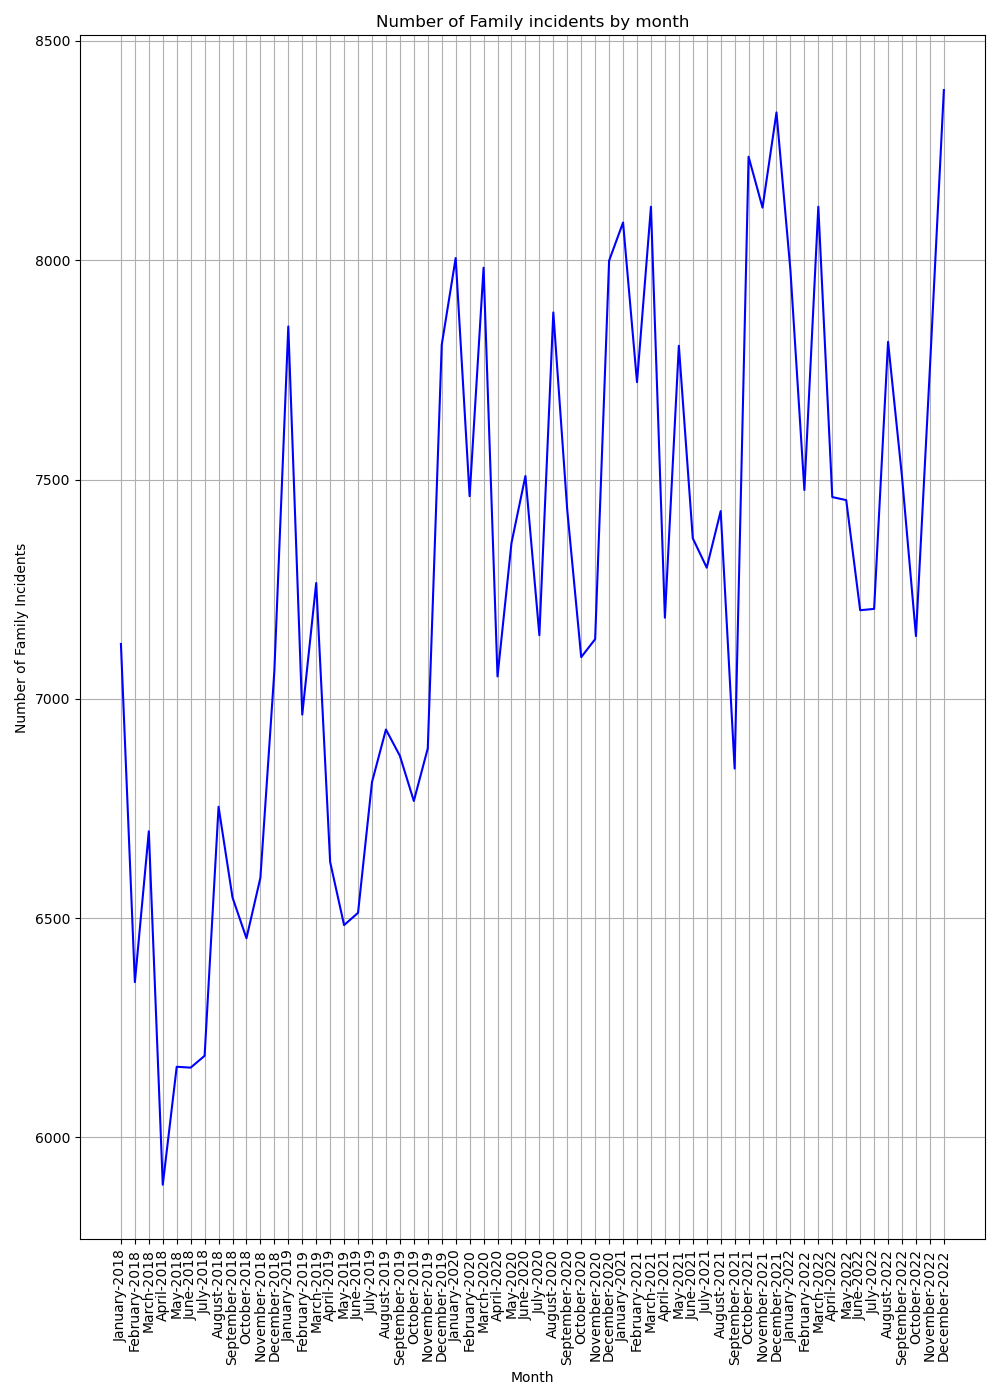

In [3]:
reduced_fam=fam_incidents[["MonYr2","MonYr","Family Incident Count"]]
sorted_fam = reduced_fam.sort_values(by="MonYr2")

plt_1 = plt.figure(figsize=(10,14))
plt.plot(sorted_fam["MonYr"],sorted_fam["Family Incident Count"], color = "blue", label = "Number of Family Incidents")
plt.title("Number of Family incidents by month")
plt.xlabel("Month")
plt.ylabel("Number of Family Incidents")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()

plt.show()

In [4]:
fam_incidents2.head()


,Year,Year ending,Category,Outcome,Family Incident Count,"Rate per 100,000 population"
0,2022,September,Children Present Flag,Child recorded as present,33154,502.882268
1,2022,September,Children Present Flag,No child was present/not recorded,58346,884.996345
2,2022,September,Criminal Incident Flag and Charges Laid,Criminal incident - Charges laid,23299,353.400916
3,2022,September,Criminal Incident Flag and Charges Laid,Criminal incident - No charges laid,18932,287.161944
4,2022,September,Criminal Incident Flag and Charges Laid,Criminal incident - Unsolved,5555,84.258641


<IPython.core.display.Javascript object>


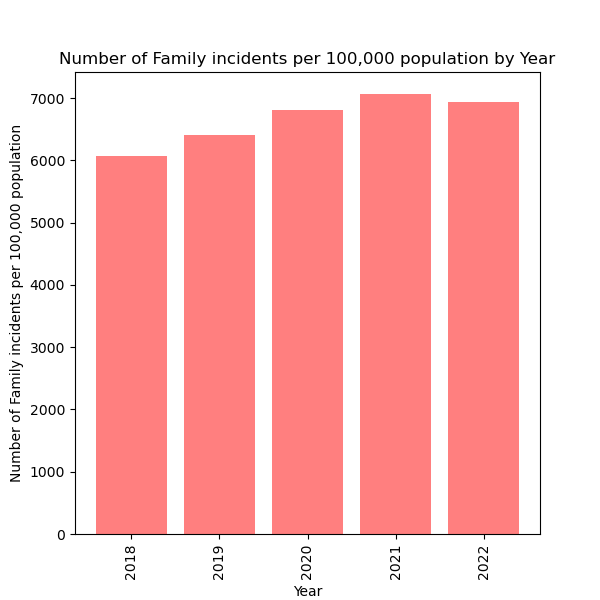

Text(0.5, 1.0, 'Number of Family incidents per 100,000 population by Year')

In [7]:
Rate_per_population=fam_incidents2.groupby(["Year"]).sum()["Rate per 100,000 population"]

x_axis = np.arange(len(Rate_per_population))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,6))

plt.bar(x_axis, Rate_per_population, color = 'r', alpha = 0.5, align = "center" )

plt.xticks(tick_locations, ["2018", "2019", "2020", "2021", "2022"], rotation="vertical")

plt.xlabel("Year")
plt.ylabel("Number of Family incidents per 100,000 population")

plt.title("Number of Family incidents per 100,000 population by Year")

